In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
import os

In [2]:
df = pd.read_csv(r'C:\Users\Daniel\project university\Выпускная работа\Data.csv')
X = df.values[:,1:]
X=np.nan_to_num(X)
Clus_dataset = StandardScaler().fit_transform(X)
Clus_dataset

array([[-0.66299649, -0.7600579 ,  1.12378669, ...,  0.6255289 ,
         0.29221041, -0.98400212],
       [ 0.69706833, -1.23766592, -0.15561759, ..., -0.6754244 ,
        -0.10068436, -0.4100651 ],
       [-0.55946917, -0.17781044,  0.19674293, ...,  1.07743221,
        -0.2040886 , -0.55769882],
       ...,
       [-0.19813852, -0.7209216 ,  0.20233596, ...,  0.08083828,
         0.74631764, -1.00234714],
       [-0.66908633, -0.45924754, -0.0317321 , ...,  0.04802575,
         0.07141052,  0.21017125],
       [-0.57570875, -0.57380899,  0.03454523, ..., -0.12775844,
         0.29522005, -1.00584143]])

In [14]:
from sklearn.cluster import KMeans
clusterrNum = 3
k_means = KMeans(init = 'k-means++', n_clusters=clusterrNum, n_init=6)
k_means.fit(X)
labels = k_means.labels_

In [15]:
df["Clus_km"]=labels

In [16]:
df.groupby("Clus_km").mean()

,cost(₽),square(м²),cost_for_meter(₽),distance(м),center_distance/m,floor,floors,0,1,2,...,55,56,57,58,59,60,61,62,63,Metro_encoders
Clus_km,,,,,,,,,,,,,,,,,,,,,
0,0.814820,0.867451,1.062972,-0.066184,-0.299778,0.364272,0.458851,0.111870,0.296759,-0.057094,...,0.491345,-0.416961,-0.086824,-0.162372,-0.370331,0.606565,0.158911,-0.078398,-0.284719,0.344627
1,-0.208687,-0.194559,-0.270688,0.140420,0.447108,0.361185,0.472190,-0.337971,-0.522508,0.348434,...,0.453294,0.289325,-0.257377,-0.673489,-0.278034,-0.582063,-0.809606,0.101230,0.099662,-0.170257
2,-0.218229,-0.245715,-0.285444,-0.042160,-0.099333,-0.317997,-0.408917,0.120068,0.137087,-0.146617,...,-0.412492,0.023137,0.158874,0.390319,0.280042,0.044515,0.330382,-0.018364,0.063285,-0.052531


C:\Users\Daniel\AppData\Local\Temp\ipykernel_304\1883822019.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:,0],X[:,3], s=area, c=labels.astype(np.float), alpha = 0.5)


<function matplotlib.pyplot.show(close=None, block=None)>

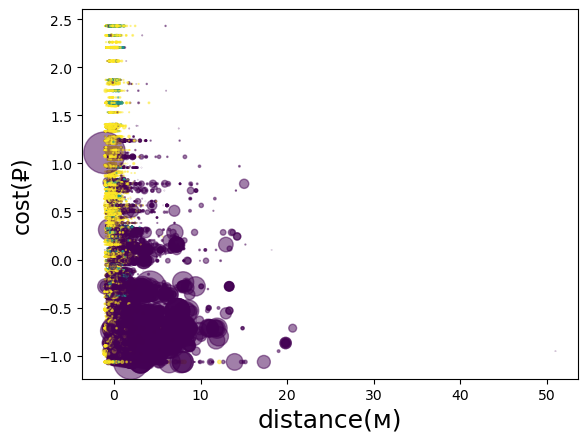

In [18]:
import matplotlib.pyplot as plt
area = np.pi *(X[:,1])**2
plt.scatter(X[:,0],X[:,3], s=area, c=labels.astype(np.float), alpha = 0.5)
plt.xlabel("distance(м)",fontsize = 18)
plt.ylabel("cost(₽)", fontsize=16)
plt.show

C:\Users\Daniel\AppData\Local\Temp\ipykernel_304\1705569413.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect = [0,0,.95,1], elev=48, azim=134)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_304\1705569413.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(X[:,1], X[:,0],X[:,3], c=labels.astype(np.float))


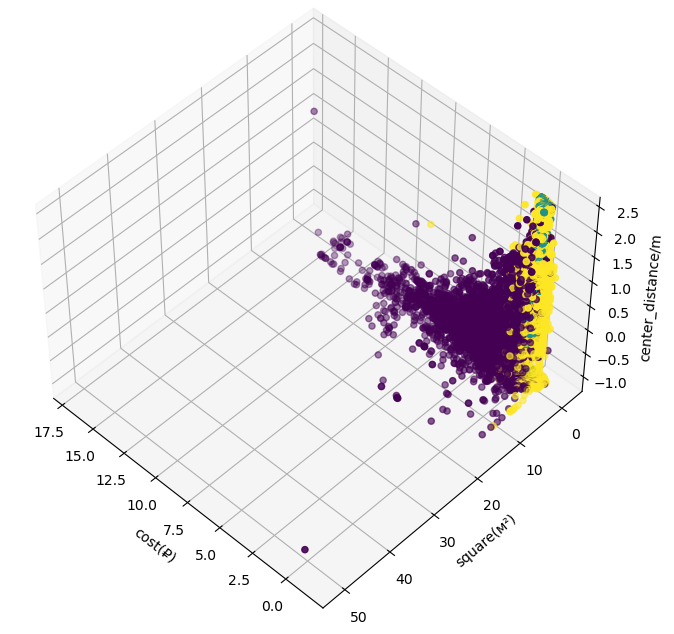

In [20]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize = (8,6))
plt.clf()
ax = Axes3D(fig, rect = [0,0,.95,1], elev=48, azim=134)

ax.set_xlabel("cost(₽)")
ax.set_ylabel("square(м²)")
ax.set_zlabel("center_distance/m")

ax.scatter(X[:,1], X[:,0],X[:,3], c=labels.astype(np.float))